# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [256]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [257]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [258]:
# What the dataset looks like?

websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [259]:
# What are the data types?

websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [260]:
# Which columns contain the features of the websites?

websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [261]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

websites['Type'].value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [262]:
# 0 for bening 1 for maliciuos websites

print(f"{websites['Type'].value_counts()[0]} benign websites")
print(f"{websites['Type'].value_counts()[1]} malicious websites")

1565 benign websites
216 malicious websites


In [263]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

websites.select_dtypes(include='object').head()

,URL,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE
0,M0_109,iso-8859-1,nginx,NaN,NaN,10/10/2015 18:21,NaN
1,B0_2314,UTF-8,Apache/2.4.10,NaN,NaN,NaN,NaN
2,B0_911,us-ascii,Microsoft-HTTPAPI/2.0,NaN,NaN,NaN,NaN
3,B0_113,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45
4,B0_403,UTF-8,NaN,US,TX,12/05/1996 0:00,11/04/2017 0:00


#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

In [264]:
# Your code here

numeric_columns = websites.select_dtypes(include=['number']).columns
correlation_matrix = websites[numeric_columns].corr()

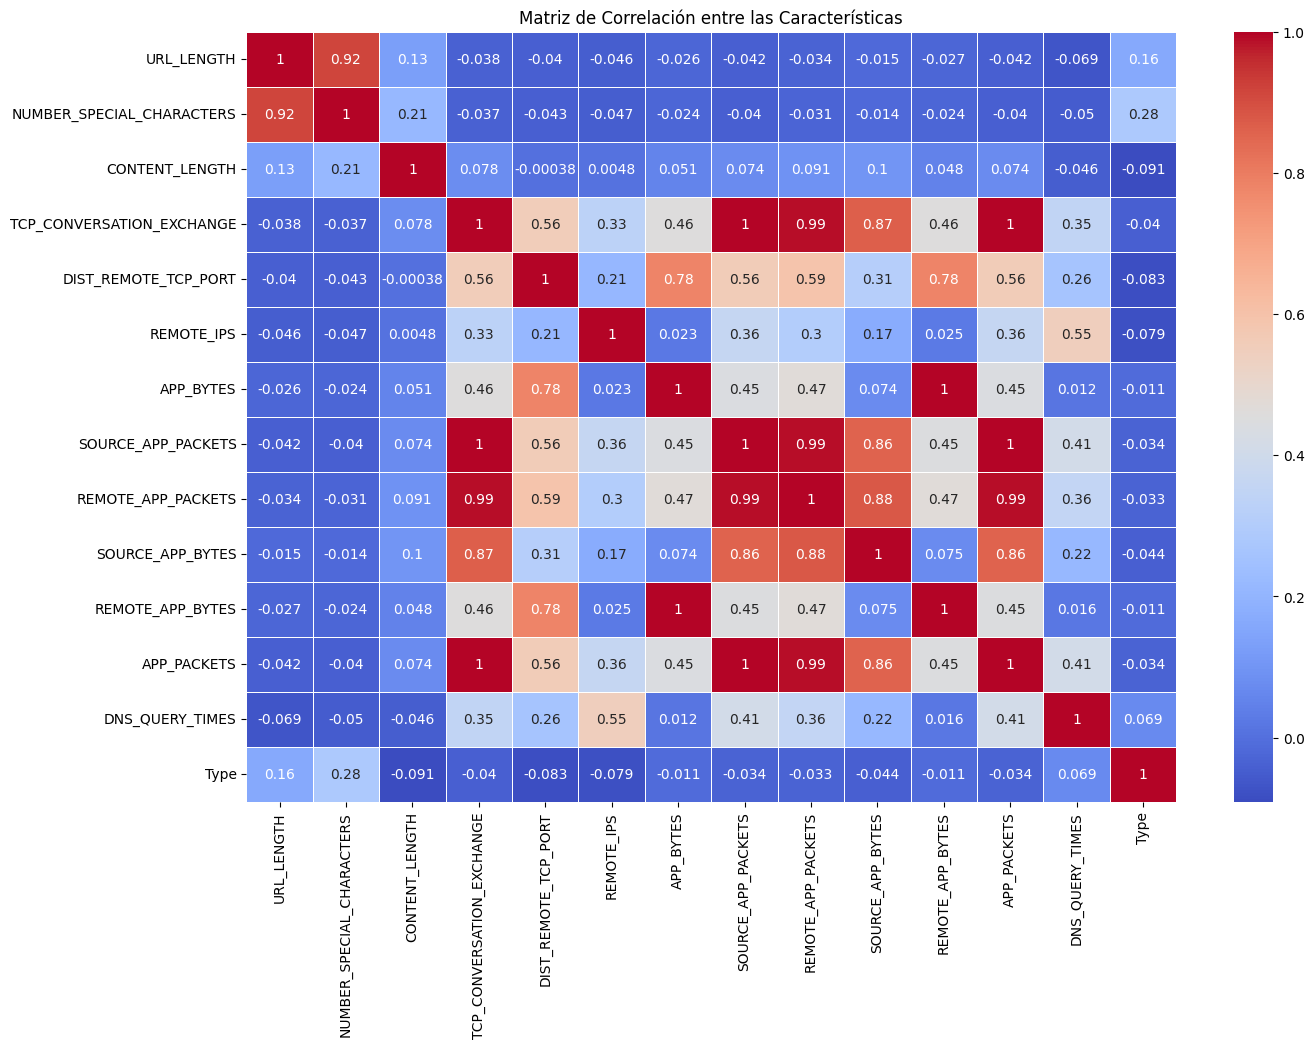

In [265]:
# Crear un mapa de calor utilizando seaborn para visualizar qué columnas tienen una alta colinealidad
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre las Características')
plt.show()

SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_BYTES, REMOTE_APP_BYTES son las que tienen mas colinealidad

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [266]:
# pip install xgboost
from xgboost import XGBClassifier

In [267]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [268]:

# Definir el modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:16:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [269]:
sort_idx = xgb.feature_importances_.argsort()

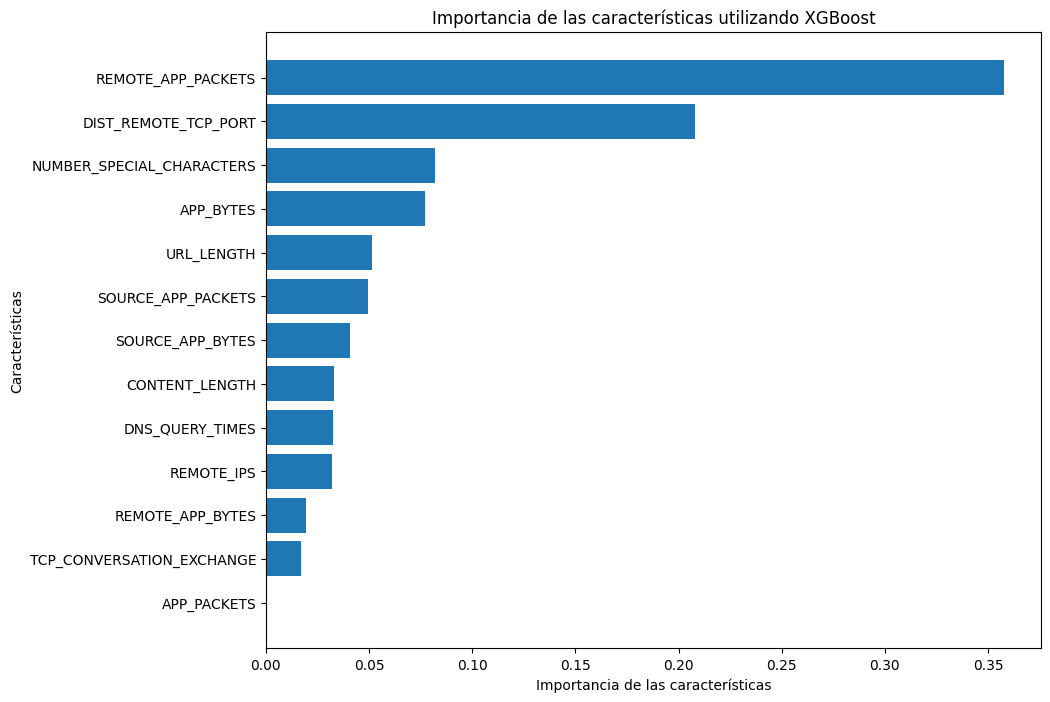

In [270]:

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sort_idx], xgb.feature_importances_[sort_idx])
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.title('Importancia de las características utilizando XGBoost')
plt.show()

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [271]:
# Your comment here

drop = ['SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES']
X_clean = X.drop(drop, axis=1)

X_clean.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,16,7,263.0,7,0,2,700,9,2.0
1,16,6,15087.0,17,7,4,1230,17,0.0
2,16,6,324.0,0,0,0,0,0,0.0
3,17,6,162.0,31,22,3,3812,39,8.0
4,17,6,124140.0,57,2,5,4278,61,4.0


In [272]:
correlation_clean = X_clean.corr()

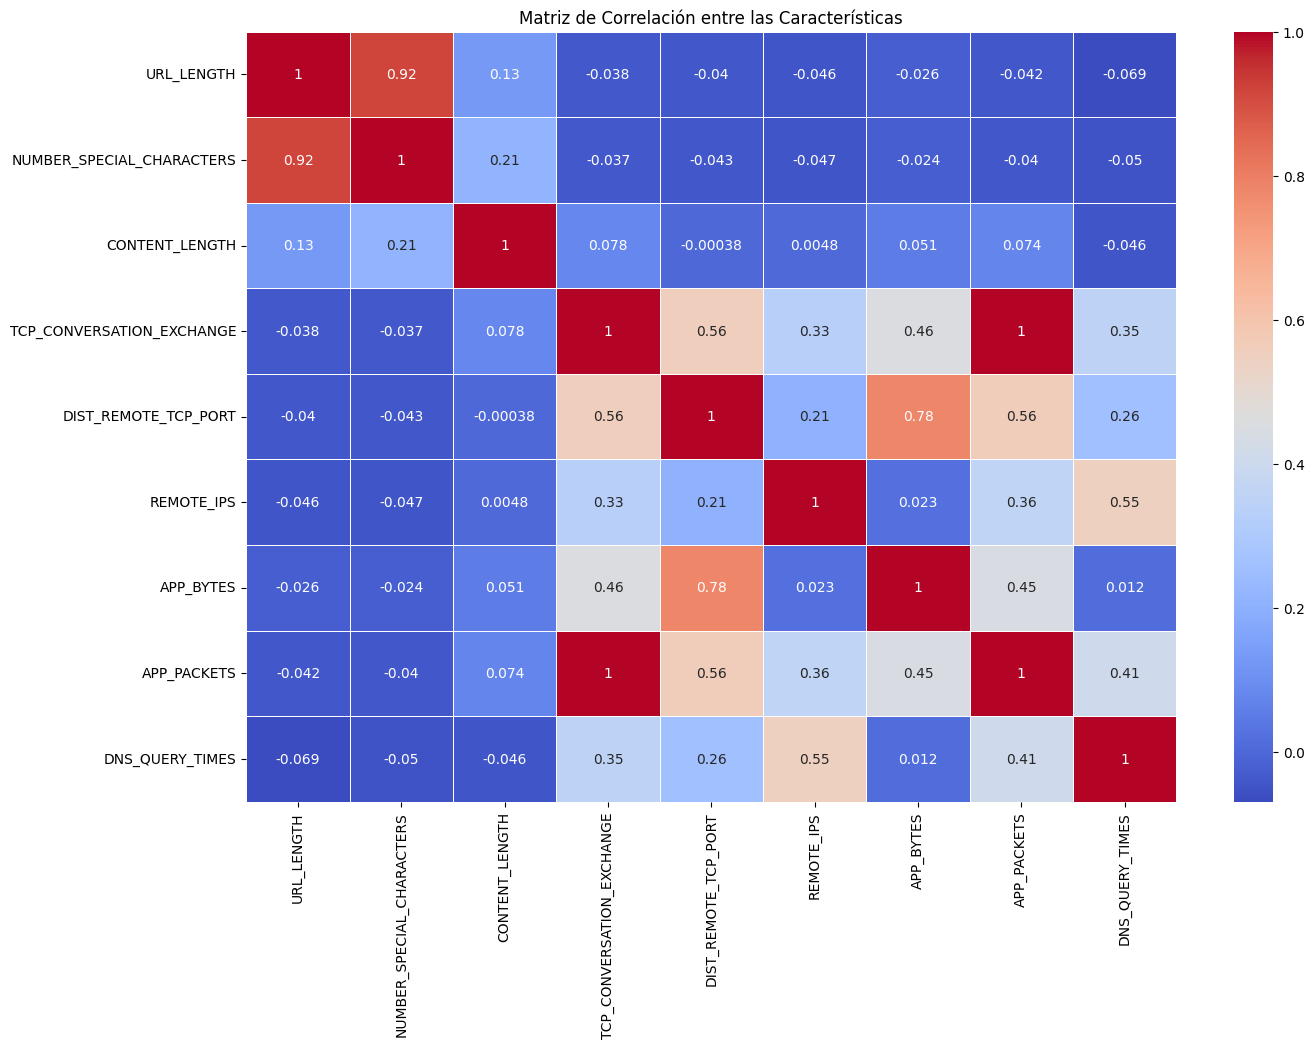

In [273]:
# Crear un mapa de calor utilizando seaborn para visualizar qué columnas tienen una alta colinealidad
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_clean, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre las Características')
plt.show()

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [274]:
# Your code here

websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [275]:
# First we will drop the columns with more than 50% of missing data

rango = len(websites) * 0.5

websites.dropna(thresh=rango, axis=1, inplace=True)
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [276]:
# Now we will drop the rows with missing data

websites = websites.dropna()

websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [277]:
# Examine missing values in each column

websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [278]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [279]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites['WHOIS_COUNTRY'].fillna('Desconocido', inplace=True)


websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: good_country.get(x, 'Desconocido'))

/var/folders/3m/dc9kwbm57qd5y4z4dr740pg00000gn/T/ipykernel_7192/1030671498.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  websites['WHOIS_COUNTRY'].fillna('Desconocido', inplace=True)


In [280]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [281]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

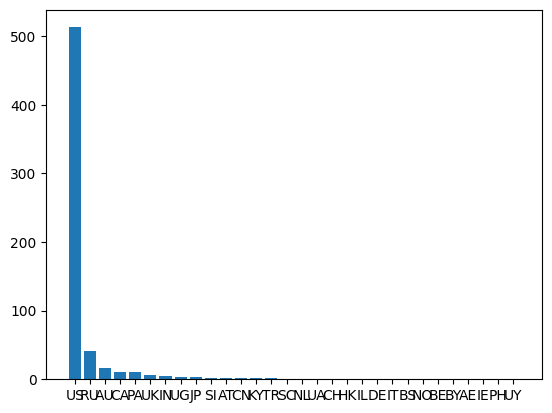

<Figure size 1500x1500 with 0 Axes>

In [282]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

Frecuencias después de agrupar los valores poco frecuentes:
WHOIS_COUNTRY
US       513
CA        41
OTHER     24
UK        16
AU        11
PA        10
JP         6
CH         5
IN         4
AT         4
SC         2
Name: count, dtype: int64


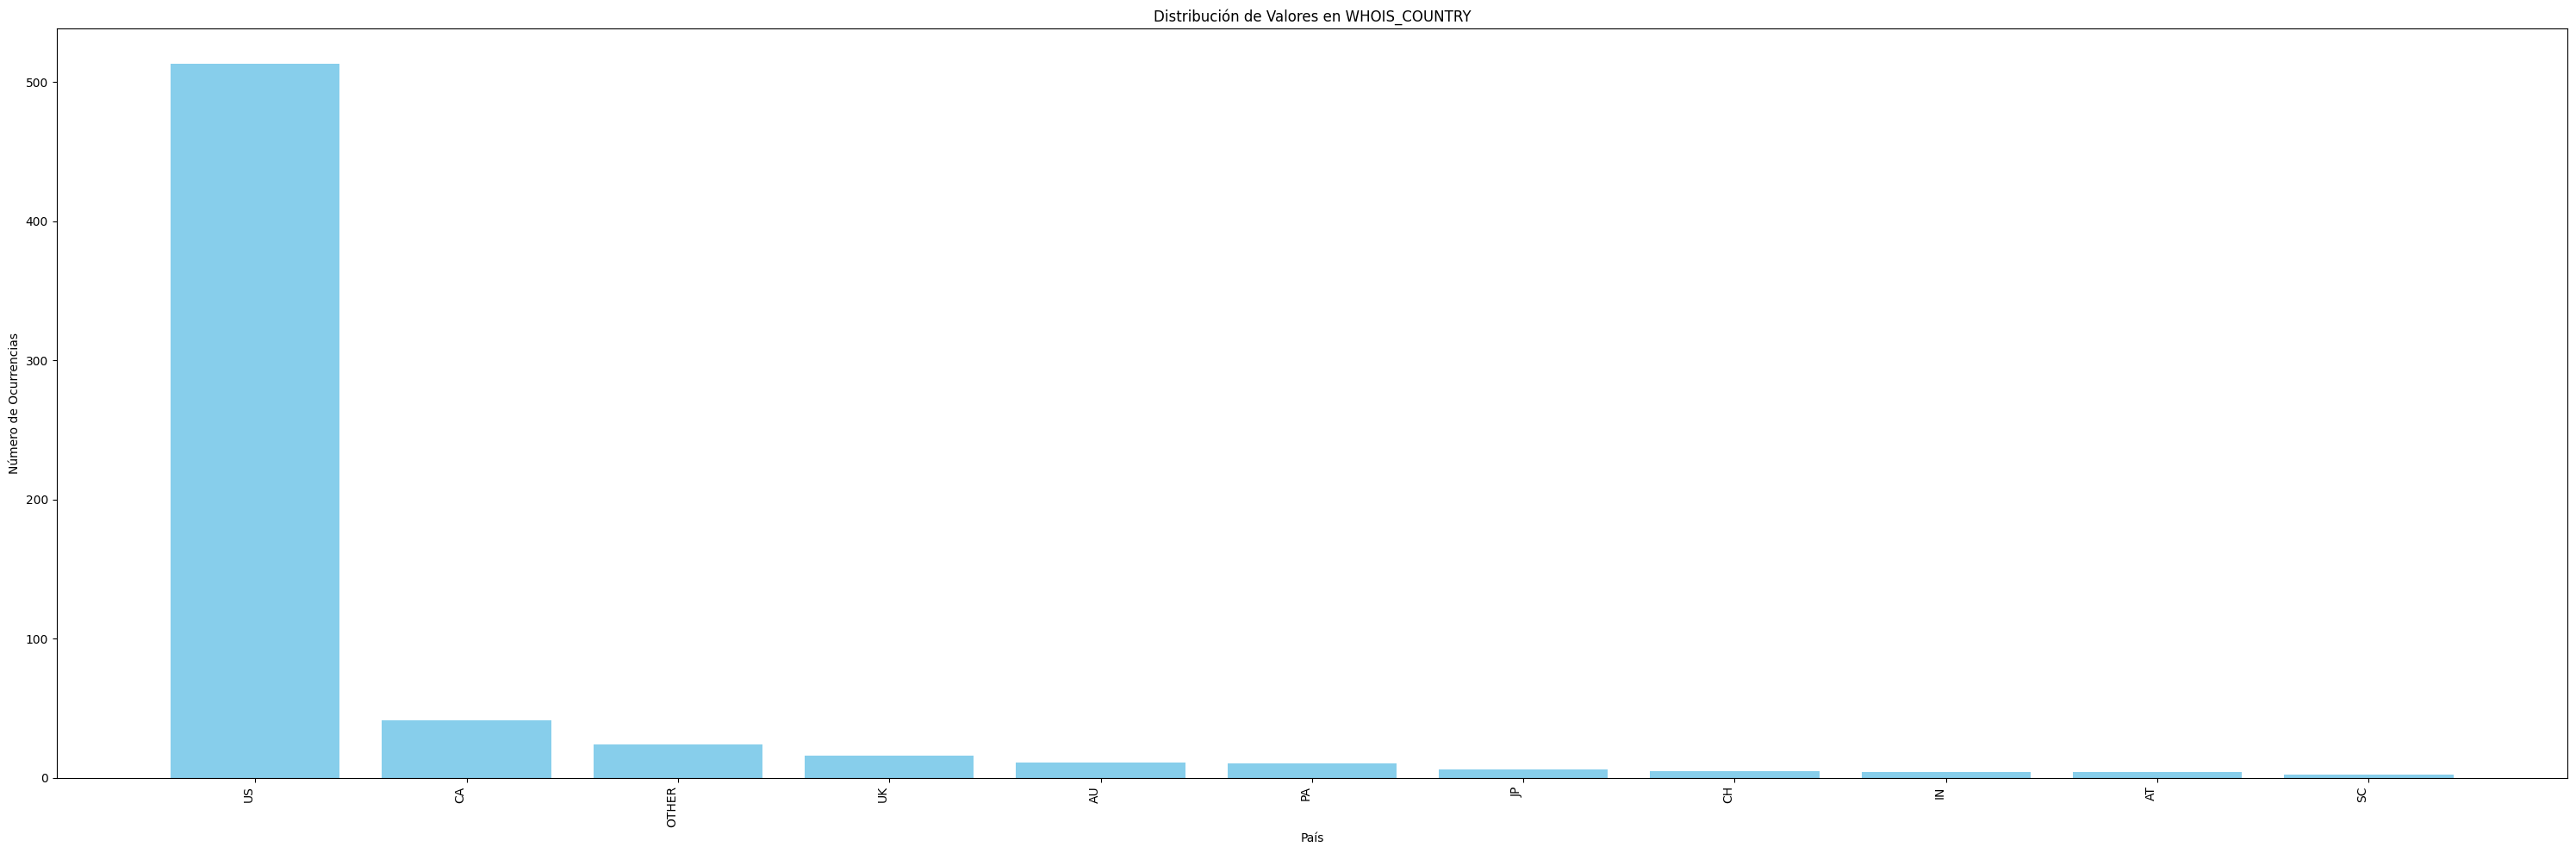

In [283]:
# Obtener los 10 valores más frecuentes en la columna 'WHOIS_COUNTRY'
valores_mas_frecuentes = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index

# Reemplazar los valores menos comunes con 'OTHER'
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in valores_mas_frecuentes else 'OTHER')

# Verificar los cambios
print("Frecuencias después de agrupar los valores poco frecuentes:")
print(websites['WHOIS_COUNTRY'].value_counts())

# Opcional: Imprimir gráfico de barras para verificar visualmente
def mostrar_grafico_barras(etiquetas, valores):
    plt.figure(figsize=(30, 10))  # Ajustar el tamaño de la figura para ocupar todo el ancho de la hoja
    plt.bar(etiquetas, valores, color='skyblue')
    plt.title('Distribución de Valores en WHOIS_COUNTRY')
    plt.xlabel('País')
    plt.ylabel('Número de Ocurrencias')
    plt.xticks(rotation=90, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
    plt.tight_layout()  # Ajustar el diseño para evitar el recorte de etiquetas
    plt.show()

# Obtener los valores únicos y sus frecuencias después del reemplazo
etiquetas_actualizadas = websites['WHOIS_COUNTRY'].value_counts().index
valores_actualizados = websites['WHOIS_COUNTRY'].value_counts().values

# Llamar a la función para imprimir el gráfico de barras
mostrar_grafico_barras(etiquetas_actualizadas, valores_actualizados)


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [284]:
# Imprimir las columnas actuales en el DataFrame
print("Columnas actuales en el DataFrame:")
print(websites.columns)

# Definir las columnas a eliminar
columnas_a_eliminar = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

# Eliminar las columnas, ignorando si algunas de ellas no existen
websites = websites.drop(columns=columnas_a_eliminar, errors='ignore')

# Imprimir las columnas restantes en el DataFrame después de eliminar
print("Columnas restantes en el DataFrame después de eliminar:")
print(websites.columns)

Columnas actuales en el DataFrame:
Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')
Columnas restantes en el DataFrame después de eliminar:
Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [285]:
print(websites.dtypes)

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [286]:
websites = websites.drop(columns=['URL'])
print(websites.columns)

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [287]:
charset_value_counts = websites['CHARSET'].value_counts()
print(charset_value_counts)

CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64


In [288]:
valores_server = websites.SERVER.value_counts()
print(valores_server)

SERVER
Apache                    162
Microsoft-HTTPAPI/2.0      76
nginx                      59
GSE                        46
Microsoft-IIS/7.5          39
                         ... 
barista/5.1.3               1
mw2225.codfw.wmnet          1
openresty/1.11.2.2          1
Apache/2.2.23 (Amazon)      1
Apache/2.2.16 (Debian)      1
Name: count, Length: 120, dtype: int64


`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [289]:
def clasificar_servidor(valor):
    if pd.isna(valor):  # Manejar valores NaN
        return 'Other'
    valor = valor.lower()  # Convertir a minúsculas para comparación
    if 'microsoft' in valor:
        return 'Microsoft'
    elif 'apache' in valor:
        return 'Apache'
    elif 'nginx' in valor:
        return 'Nginx'
    elif 'cloudflare' in valor:
        return 'Cloudflare'
    else:
        return 'Other'

# Aplicar la función de clasificación a la columna 'SERVER'
websites['SERVER'] = websites['SERVER'].astype(str).apply(clasificar_servidor)


Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [290]:
print(websites['SERVER'].value_counts())

SERVER
Apache       298
Microsoft    127
Other        108
Nginx        103
Name: count, dtype: int64


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [291]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame original para realizar las transformaciones
websites_codificado = websites.copy()

# Identificar las columnas categóricas a transformar
columnas_categoricas = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY']

# Inicializar el LabelEncoder
etiquetador = LabelEncoder()

# Diccionario para almacenar el mapeo de cada columna categórica
mapeo_categorias = {}

# Transformar cada columna categórica y guardar el mapeo
for columna in columnas_categoricas:
    websites_codificado[columna] = etiquetador.fit_transform(websites_codificado[columna]) + 1  # Comenzar desde 1
    # Guardar el mapeo en el diccionario
    mapeo_categorias[columna] = dict(zip(etiquetador.classes_, etiquetador.transform(etiquetador.classes_) + 1))

# Verificar el resultado de la transformación
print("Primeras filas del DataFrame codificado:")
print(websites_codificado.head())

# Imprimir el diccionario de mapeo
print("\nDiccionario de mapeo de categorías:")
print(mapeo_categorias)

# Verificar los tipos de datos de cada columna en el DataFrame codificado
print("\nTipos de datos de cada columna en el DataFrame codificado:")
print(websites_codificado.dtypes)

Primeras filas del DataFrame codificado:
    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
3           17                          6        1       3           162.0   
6           18                          6        3       1           345.0   
7           19                          6        4       2           324.0   
11          20                          6        4       2           324.0   
16          21                          7        3       3           686.0   

    WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  \
3              11                         31                    22   
6              11                         12                     0   
7              11                          0                     0   
11             11                          0                     0   
16              7                          6                     0   

    REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [292]:
# Revisar las primeras filas del DataFrame para confirmar la conversión
print("Primeras filas:")
print(websites_codificado.head())

# Comprobar los tipos de datos de cada columna para asegurarse de que no queden columnas categóricas
print("\nTipos de datos:")
print(websites_codificado.dtypes)


Primeras filas:
    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
3           17                          6        1       3           162.0   
6           18                          6        3       1           345.0   
7           19                          6        4       2           324.0   
11          20                          6        4       2           324.0   
16          21                          7        3       3           686.0   

    WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  \
3              11                         31                    22   
6              11                         12                     0   
7              11                          0                     0   
11             11                          0                     0   
16              7                          6                     0   

    REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
3            3       3812

No hay columna categorica

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [293]:
from sklearn.model_selection import train_test_split

X = websites_codificado.drop('Type', axis=1)
y = websites_codificado['Type']

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [294]:
from sklearn.linear_model import LogisticRegression

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [295]:
from sklearn.linear_model import LogisticRegression

# Cambiar el solucionador a 'saga'
modelo = LogisticRegression(solver='saga', max_iter=1000)
modelo.fit(X_entrenamiento, y_entrenamiento)

y_pred = modelo.predict(X_prueba)


Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [296]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_prueba, y_pred)
accuracy = accuracy_score(y_prueba, y_pred)

print(f"conf_matrix:\n{conf_matrix}")
print(f"accuracy: {accuracy}")

conf_matrix:
[[117   0]
 [ 11   0]]
accuracy: 0.9140625


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

El modelo presenta muy buenas metricas, supongo que es debido a que los datos han sido limpiados en profundidad.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [ ]:
model_tree = DecisionTreeClassifier(random_state=42)

model_tree.fit(X_entrenamiento, y_entrenamiento)

y_prob_tree = model_tree.predict_proba(X_prueba)[:, 1]

y_pred_tree = (y_prob_tree >= 0.5).astype(int)

conf_matrix_tree = confusion_matrix(y_prueba, y_pred_tree)
accuracy_tree = accuracy_score(y_prueba, y_pred_tree)

print(f"conf_matrix_tree:\n{conf_matrix_tree}")
print(f"accuracy_tree: {accuracy_tree}")

conf_matrix_tree:
[[113   4]
 [  5   6]]
accuracy_tree: 0.9296875


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [ ]:
model_tree_depth5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model_tree_depth5.fit(X_entrenamiento, y_entrenamiento)

# Calcular las probabilidades predichas para el conjunto de prueba
y_prob_depth5 = model_tree_depth5.predict_proba(X_prueba)[:, 1]  # Probabilidades de clase positiva (1)

# Aplicar un umbral de 0.5 para obtener las predicciones
y_pred_depth5 = (y_prob_depth5 >= 0.5).astype(int)

conf_matrix_depth5 = confusion_matrix(y_prueba, y_pred_depth5)
accuracy_depth5 = accuracy_score(y_prueba, y_pred_depth5)

print(f"conf_matrix_depth5:\n{conf_matrix_depth5}")
print(f"accuracy_depth5: {accuracy_depth5}")

conf_matrix_depth5:
[[112   5]
 [  7   4]]
accuracy_depth5: 0.90625


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

Ha aumentado el valor de Negativos (tanto True negative como False Negative) y ha disminuido el valor de Positivos (tasnto True positives como False positives).

<!-- Add your conclusion here -->